In [28]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Đường dẫn đến thư mục chứa hình ảnh của Apple và Banana
apple_folder = "D:/GKD/Data-Science/TienXuLyDuLieu/BUOI4/DATA/output_image_Apple"
banana_folder = "D:/GKD/Data-Science/TienXuLyDuLieu/BUOI4/DATA/output_image_Banana"

# Xây dựng dữ liệu từ các thư mục chứa hình ảnh
def create_dataset(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))  # Đổi kích thước hình ảnh
        images.append(img)
        labels.append(label)
    return images, labels

# Tạo dữ liệu cho Apple và Banana
apple_images, apple_labels = create_dataset(apple_folder, 0)  # Gán 0 cho Apple
banana_images, banana_labels = create_dataset(banana_folder, 1)  # Gán 1 cho Banana

# Kết hợp dữ liệu từ hai loại trái cây
images = np.array(apple_images + banana_images)
labels = np.array(apple_labels + banana_labels)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu và chuyển nhãn thành dạng one-hot
X_train = X_train / 255.0  # Chuẩn hóa giá trị pixel về khoảng 0-1
X_test = X_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Xây dựng mô hình CNN đơn giản
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # 2 neurons đầu ra tương ứng với Apple và Banana
])

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
25/25 [==============================] - 11s 394ms/step - loss: 0.5601 - accuracy: 0.9478 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 9s 341ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 9s 347ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 9s 355ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 9s 353ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 10s 398ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 10s 385ms/step - loss: 0.0000e+00 - accuracy: 1.00

In [48]:
def predict_fruit(image_path, trained_model):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Mở rộng chiều cho mảng hình ảnh
    prediction = trained_model.predict(img)
    return np.argmax(prediction)

# Dự đoán trên hình ảnh của Apple
apple_image_path = "D:\GKD\Data-Science\TienXuLyDuLieu\BUOI4\DATA\output_image_Apple\otsu_0_100.jpg"
apple_prediction = predict_fruit(apple_image_path, model)
print("Dự đoán cho hình ảnh của Apple:", "Apple" if apple_prediction == 0 else "Banana")

# Dự đoán trên hình ảnh của Banana
banana_image_path = "D:\GKD\Data-Science\TienXuLyDuLieu\BUOI4\DATA\output_image_Banana\otsu_1_100.jpg"
banana_prediction = predict_fruit(banana_image_path, model)
print("Dự đoán cho hình ảnh của Banana:", "Apple" if banana_prediction == 0 else "Banana")



1/1 [==============================] - 0s 26ms/step
Dự đoán cho hình ảnh của Apple: Apple
1/1 [==============================] - 0s 23ms/step
Dự đoán cho hình ảnh của Banana: Banana


1/1 [==============================] - 0s 32ms/step


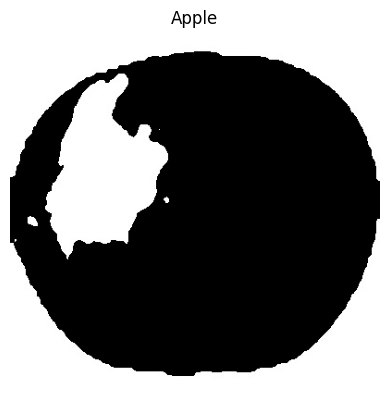

1/1 [==============================] - 0s 28ms/step


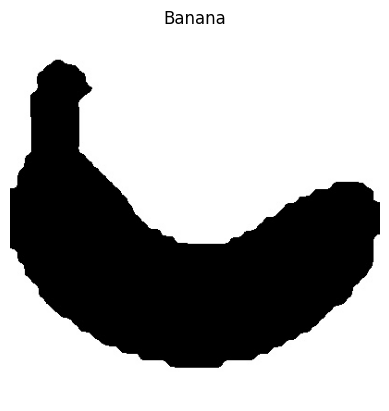

In [46]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Code xây dựng mô hình, huấn luyện, và dự đoán đã được định nghĩa ở trên

# Sử dụng hàm dự đoán để hiển thị output là hình và tên của hình dự đoán
def display_image_prediction(image_path, trained_model):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = trained_model.predict(img)
    fruit_label = "Apple" if np.argmax(prediction) == 0 else "Banana"

    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(fruit_label)
    plt.axis('off')
    plt.show()

# Đường dẫn đến hình ảnh Apple
apple_image_path = "D:\GKD\Data-Science\TienXuLyDuLieu\BUOI4\DATA\output_image_Apple\otsu_10_100.jpg"
# Dự đoán và hiển thị hình ảnh của Apple cùng với tên dự đoán
display_image_prediction(apple_image_path, model)

# Đường dẫn đến hình ảnh Banana
banana_image_path = "D:\GKD\Data-Science\TienXuLyDuLieu\BUOI4\DATA\output_image_Banana\otsu_60_100.jpg"
# Dự đoán và hiển thị hình ảnh của Banana cùng với tên dự đoán
display_image_prediction(banana_image_path, model)
